
# Análisis de Diagnóstico - Dataset de PIB y Emisiones

Este análisis profundiza en un conjunto de datos económicos y demográficos relacionados con el Producto Interno Bruto (PIB), la población, la esperanza de vida y las emisiones de CO2 a lo largo del tiempo para varios países. A través de este análisis, se buscan identificar las relaciones clave entre estas variables y observar cómo los cambios en la economía impactan a la población y al medio ambiente.

### Objetivo:
El objetivo es explorar las interacciones entre la evolución económica (PIB), las emisiones de CO2 y los indicadores sociales como la esperanza de vida. Se busca generar una comprensión profunda de cómo las variables interaccionan y cómo se pueden aplicar estos hallazgos a las políticas económicas y ambientales.

## Variables Principales:
- **GDP**: Producto Interno Bruto total del país.
- **Population**: Población total del país.
- **Life_exp**: Esperanza de vida.
- **CO2_emissions**: Emisiones de CO2.
- **GDP_per_capita_USD**: PIB per cápita en dólares estadounidenses.
- **Life_expectancy_years**: Esperanza de vida en años.
- **Exports_percent_GDP**: Porcentaje del PIB representado por las exportaciones.
- **Imports_percent_GDP**: Porcentaje del PIB representado por las importaciones.

### Métodos:
Se utilizaron herramientas estadísticas y visualizaciones para analizar el comportamiento de las variables a través del tiempo, identificar posibles correlaciones y destacar las tendencias que podrían informar decisiones políticas.


In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Cargar el dataset
file_path = './output/WDI_Complete_Analysis_PowerBI.csv'
dataset = pd.read_csv(file_path)

# Limpieza de datos
dataset_cleaned = dataset.dropna()  # Eliminar filas con valores nulos
dataset_cleaned.describe()


,Year,GDP,Population,Life_exp,CO2_emissions,Exports,Imports,GDP_per_capita_USD,Life_expectancy_years,Population_total,CO2_emissions_per_capita,Exports_percent_GDP,Imports_percent_GDP
count,6852.000000,6852.000000,6.852000e+03,6852.000000,6852.000000,6852.000000,6852.000000,6852.000000,6852.000000,6.852000e+03,6852.000000,6852.000000,6852.000000
mean,2007.401197,12639.252504,3.347630e+08,69.469332,375.359436,37.848886,42.010712,12639.252504,69.469332,3.347630e+08,375.359436,37.848886,42.010712
std,9.417885,17645.901881,9.488247e+08,8.847965,3394.329005,28.055079,26.146154,17645.901881,8.847965,9.488247e+08,3394.329005,28.055079,26.146154
min,1991.000000,188.658280,1.764800e+04,12.158000,-89.584330,0.005377,0.015622,188.658280,12.158000,1.764800e+04,-89.584330,0.005377,0.015622
25%,1999.000000,1525.579975,3.668153e+06,64.108000,0.000000,21.522535,26.035085,1525.579975,64.108000,3.668153e+06,0.000000,21.522535,26.035085
50%,2008.000000,4489.958000,1.191992e+07,70.963715,38.144455,30.331379,34.118810,4489.958000,70.963715,1.191992e+07,38.144455,30.331379,34.118810
75%,2016.000000,16583.763250,9.187286e+07,76.153507,129.601015,46.608556,52.100930,16583.763250,76.153507,9.187286e+07,129.601015,46.608556,52.100930
max,2023.000000,118382.910000,8.064976e+09,85.532684,62800.000000,433.836000,429.359100,118382.910000,85.532684,8.064976e+09,62800.000000,433.836000,429.359100



### Limpieza de los Datos

La limpieza de los datos es un paso fundamental en cualquier análisis, ya que asegura que los resultados sean fiables y no se vean afectados por valores nulos o inconsistentes. En este caso, se eliminaron las filas con valores faltantes en el dataset, ya que contienen información que no podemos usar para un análisis completo.


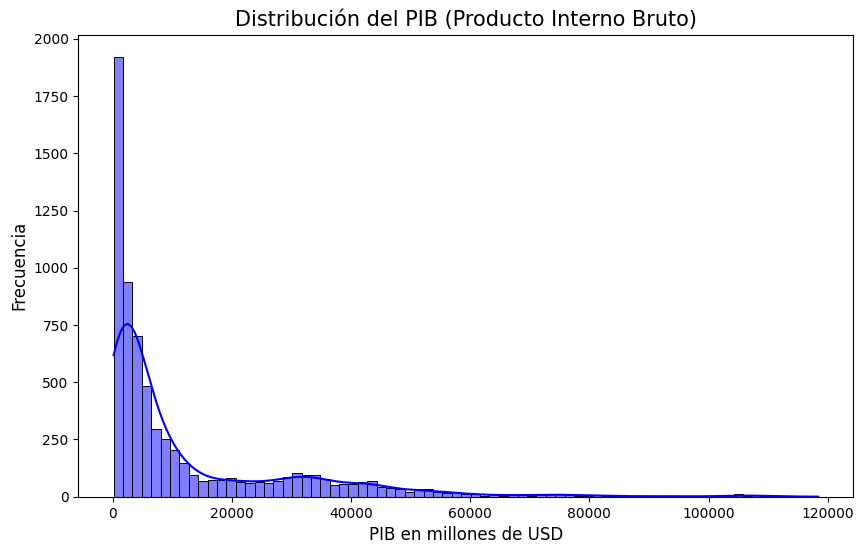

In [3]:

# Graficar distribución de PIB
plt.figure(figsize=(10, 6))
sns.histplot(dataset_cleaned['GDP'], kde=True, color='blue')
plt.title('Distribución del PIB (Producto Interno Bruto)', fontsize=15)
plt.xlabel('PIB en millones de USD', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.show()



### Distribución del PIB

Al analizar la distribución del PIB en los países del dataset, podemos observar que existe una gran variabilidad, con algunos países con PIB extremadamente altos, mientras que otros se encuentran en niveles muy bajos. Este tipo de distribución es común en economías globales, donde las naciones más desarrolladas tienen economías mucho más grandes que las naciones en vías de desarrollo.

**Implicaciones**:
Un PIB alto generalmente refleja economías desarrolladas o industrializadas, mientras que un PIB bajo puede estar asociado a economías emergentes o subdesarrolladas. Analizar esta distribución es crucial para entender las diferencias económicas entre los países y sus políticas.


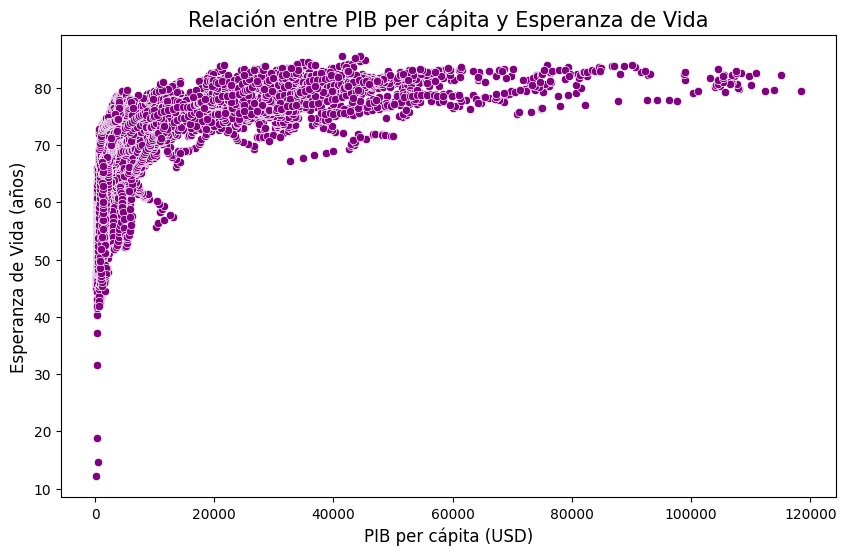

In [4]:

# Graficar la relación entre PIB per cápita y la esperanza de vida
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dataset_cleaned, x='GDP_per_capita_USD', y='Life_exp', color='purple')
plt.title('Relación entre PIB per cápita y Esperanza de Vida', fontsize=15)
plt.xlabel('PIB per cápita (USD)', fontsize=12)
plt.ylabel('Esperanza de Vida (años)', fontsize=12)
plt.show()



### Relación entre PIB per cápita y Esperanza de Vida

Este gráfico muestra la relación entre el PIB per cápita y la esperanza de vida en los diferentes países. Como podemos observar, existe una tendencia positiva: a medida que el PIB per cápita aumenta, también lo hace la esperanza de vida.

**Análisis**:
Este patrón sugiere que en los países con mayor desarrollo económico, las personas tienden a vivir más tiempo. Las economías desarrolladas pueden ofrecer mejores condiciones de salud, educación y calidad de vida en general, lo que contribuye a una mayor esperanza de vida.

Sin embargo, es importante mencionar que esta relación no es causal; otros factores como las políticas públicas y el acceso a la atención médica también desempeñan un papel crucial.


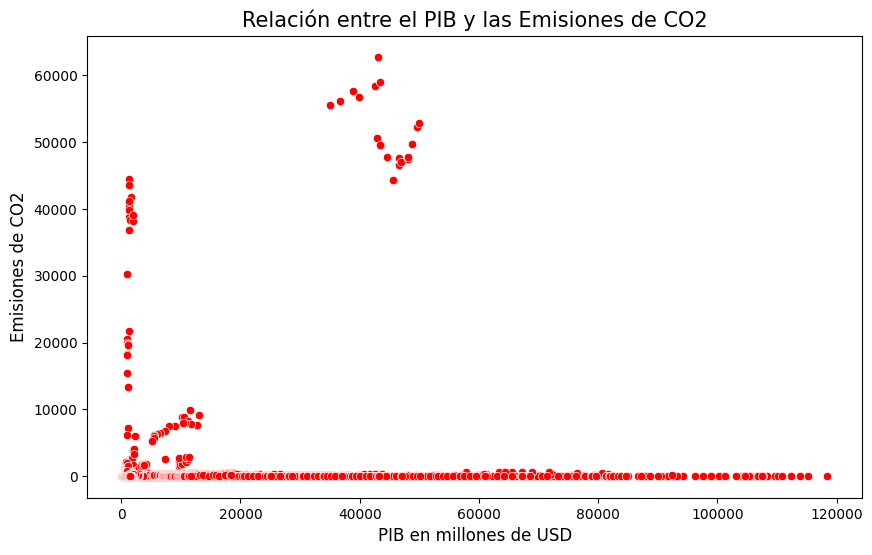

In [5]:

# Graficar la relación entre PIB y las emisiones de CO2
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dataset_cleaned, x='GDP', y='CO2_emissions', color='red')
plt.title('Relación entre el PIB y las Emisiones de CO2', fontsize=15)
plt.xlabel('PIB en millones de USD', fontsize=12)
plt.ylabel('Emisiones de CO2', fontsize=12)
plt.show()



### Relación entre el PIB y las Emisiones de CO2

Este gráfico muestra cómo las emisiones de CO2 se relacionan con el PIB. Se observa que los países con mayor PIB tienden a generar mayores emisiones de CO2. Esto es consistente con la idea de que las economías más industrializadas suelen depender más de combustibles fósiles, lo que resulta en una mayor huella de carbono.

**Implicaciones**:
Este hallazgo resalta un desafío clave para la sostenibilidad: el crecimiento económico a menudo va de la mano con un mayor impacto ambiental. Los responsables de las políticas deben equilibrar el crecimiento económico con la transición hacia fuentes de energía más limpias y sostenibles.


In [6]:

# Crear un dashboard interactivo con Plotly
fig = px.scatter(dataset_cleaned, x='GDP_per_capita_USD', y='Life_exp', color='Year', 
                 title="Relación Interactiva entre PIB per cápita y Esperanza de Vida",
                 labels={"GDP_per_capita_USD": "PIB per cápita (USD)", "Life_exp": "Esperanza de Vida (años)"})
fig.update_layout(width=900, height=600)
fig.show()



## Conclusión

A través de este análisis, se pudo observar cómo el crecimiento económico está relacionado con varios indicadores clave, como la esperanza de vida y las emisiones de CO2. Sin embargo, este análisis también subraya la necesidad de políticas que promuevan un crecimiento económico sostenible que no dependa excesivamente de los recursos no renovables y que garantice el bienestar de la población a largo plazo.

El próximo paso sería profundizar en las políticas ambientales y de salud pública que podrían ayudar a mitigar los efectos negativos del crecimiento económico, como el aumento de las emisiones de CO2, mientras se sigue promoviendo el desarrollo económico en los países más necesitados.
